<a href="https://colab.research.google.com/github/SaachiK08/PixelPairs_Augenblick-25/blob/main/CausalModel_PixelPair_Augenblick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install causalinference
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from causalinference import CausalModel
from sklearn.preprocessing import StandardScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Load the dataset
data = pd.read_csv('/content/ihdp_data.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0       True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
1      False   6.875856    7.856495  6.636059  7.562718 -1.736945 -1.802002   
2      False   2.996273    6.633952  1.570536  6.121617 -0.807451 -0.202946   
3      False   1.366206    5.697239  1.244738  5.889125  0.390083  0.596582   
4      False   1.963538    6.202582  1.685048  6.191994 -1.045229 -0.602710   

         x3        x4        x5  ...  x16  x17  x18  x19  x20  x21  x22  x23  \
0  1.128554  0.161703 -0.316603  ...    1    1    1    1    0    0    0    0   
1  0.383828  2.244320 -0.629189  ...    1    1    1    1    0    0    0    0   
2 -0.360898 -0.879606  0.808706  ...    1    0    1    1    0    0    0    0   
3 -1.850350 -0.879606 -0.004017  ...    1    0    1    1    0    0    0    0   
4  0.011465  0.161703  0.683672  ...    1    1    1    1    0    0    0    0   

   x24  x25  
0    0    0  
1    0    0  
2 

In [ ]:
# Check for missing values
print(data.isnull().sum())

treatment     0
y_factual     0
y_cfactual    0
mu0           0
mu1           0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
dtype: int64


In [ ]:
# Summary statistics
print(data.describe())

        y_factual  y_cfactual         mu0         mu1            x1  \
count  747.000000  747.000000  747.000000  747.000000  7.470000e+02   
mean     3.159538    5.696107    2.432513    6.448580  2.853585e-17   
std      2.179956    1.980121    1.281515    0.454766  1.000000e+00   
min     -1.543902   -1.037628    0.924453    5.591647 -2.731287e+00   
25%      1.626779    5.053598    1.518409    6.087863 -6.669461e-01   
50%      2.577294    6.209686    2.114661    6.419095  1.652752e-01   
75%      4.494637    6.948922    2.989305    6.765241  8.137593e-01   
max     11.268228   10.171004    9.821792    7.954804  1.505476e+00   

                 x2            x3            x4            x5            x6  \
count  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02   
mean  -9.511951e-18 -2.853585e-17 -5.849850e-16  2.853585e-17 -7.466881e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.800823e+00 -1.850350e+00 -8.796060e

In [ ]:
# Check the distribution of the treatment variable
print(data['treatment'].value_counts())

treatment
False    608
True     139
Name: count, dtype: int64


In [ ]:
# Standardize the covariates (x1 to x25)
scaler = StandardScaler()
covariates = data.iloc[:, 5:30]  # Assuming x1 to x25 are columns 5 to 29
data.iloc[:, 5:30] = scaler.fit_transform(covariates)

<ipython-input-9-407e14d1449e>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.97227182 -1.02851895 -1.02851895 -1.02851895  0.97227182  0.97227182
  0.97227182  0.97227182  0.97227182 -1.02851895 -1.02851895 -1.02851895
  0.97227182  0.97227182 -1.02851895  0.97227182  0.97227182  0.97227182
  0.97227182 -1.02851895 -1.02851895  0.97227182 -1.02851895 -1.02851895
  0.97227182  0.97227182 -1.02851895 -1.02851895 -1.02851895 -1.02851895
  0.97227182  0.97227182  0.97227182  0.97227182  0.97227182 -1.02851895
  0.97227182  0.97227182 -1.02851895  0.97227182  0.97227182  0.97227182
 -1.02851895  0.97227182 -1.02851895  0.97227182  0.97227182  0.97227182
  0.97227182  0.97227182 -1.02851895  0.97227182 -1.02851895  0.97227182
 -1.02851895 -1.02851895 -1.02851895 -1.02851895  0.97227182  0.97227182
  0.97227182  0.97227182  0.97227182 -1.02851895 -1.02851895  0.97227182
  0.97227182  0.97227182  0.97227182 -1.02851

In [ ]:
print(data.head())

   treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0       True   5.599916    4.318780  3.268256  6.854457 -0.528957 -0.343685   
1      False   6.875856    7.856495  6.636059  7.562718 -1.738109 -1.803210   
2      False   2.996273    6.633952  1.570536  6.121617 -0.807992 -0.203082   
3      False   1.366206    5.697239  1.244738  5.889125  0.390344  0.596982   
4      False   1.963538    6.202582  1.685048  6.191994 -1.045929 -0.603114   

         x3        x4        x5  ...       x16       x17       x18       x19  \
0  1.129310  0.161811 -0.316815  ...  0.204551  0.826095  0.193649  2.529039   
1  0.384085  2.245823 -0.629611  ...  0.204551  0.826095  0.193649  2.529039   
2 -0.361140 -0.880195  0.809248  ...  0.204551 -1.210515  0.193649  2.529039   
3 -1.851590 -0.880195 -0.004020  ...  0.204551 -1.210515  0.193649  2.529039   
4  0.011473  0.161811  0.684130  ...  0.204551  0.826095  0.193649  2.529039   

        x20       x21       x22       x23   

In [ ]:
print(data.describe())

        y_factual  y_cfactual         mu0         mu1            x1  \
count  747.000000  747.000000  747.000000  747.000000  7.470000e+02   
mean     3.159538    5.696107    2.432513    6.448580  1.426793e-17   
std      2.179956    1.980121    1.281515    0.454766  1.000670e+00   
min     -1.543902   -1.037628    0.924453    5.591647 -2.733117e+00   
25%      1.626779    5.053598    1.518409    6.087863 -6.673930e-01   
50%      2.577294    6.209686    2.114661    6.419095  1.653859e-01   
75%      4.494637    6.948922    2.989305    6.765241  8.143046e-01   
max     11.268228   10.171004    9.821792    7.954804  1.506484e+00   

                 x2            x3            x4            x5            x6  \
count  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02  7.470000e+02   
mean   4.755975e-18  2.377988e-17  2.853585e-17  7.133963e-18 -1.902390e-17   
std    1.000670e+00  1.000670e+00  1.000670e+00  1.000670e+00  1.000670e+00   
min   -3.803369e+00 -1.851590e+00 -8.801953e

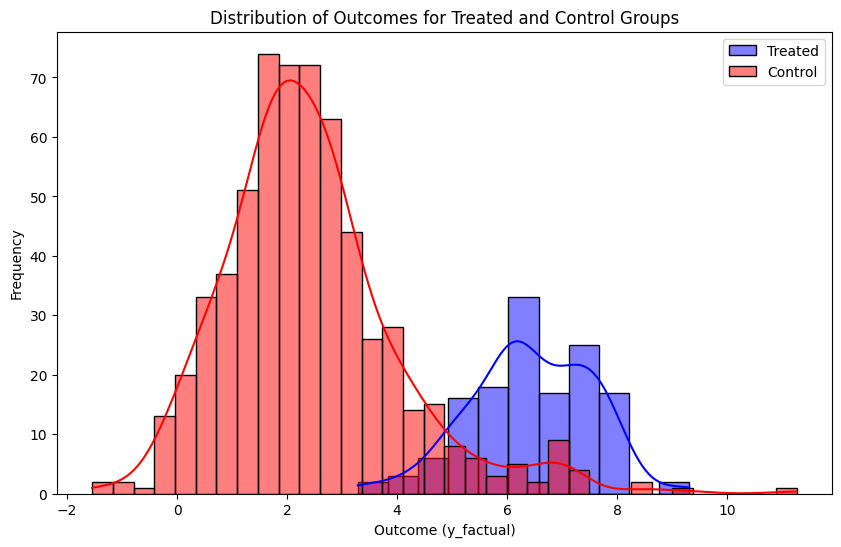

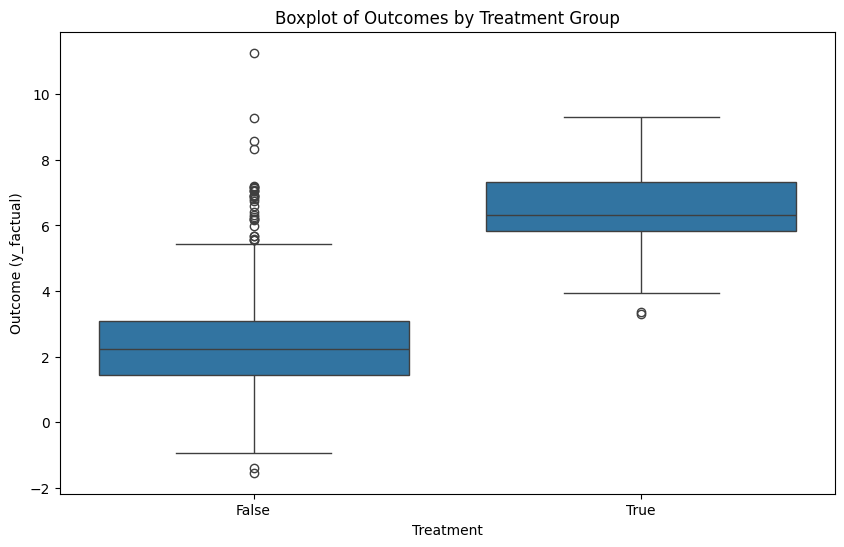

In [ ]:
# Visualize the distribution of outcomes for treated and control groups
plt.figure(figsize=(10, 6))
sns.histplot(data[data['treatment'] == 1]['y_factual'], color='blue', label='Treated', kde=True)
sns.histplot(data[data['treatment'] == 0]['y_factual'], color='red', label='Control', kde=True)
plt.title('Distribution of Outcomes for Treated and Control Groups')
plt.xlabel('Outcome (y_factual)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Boxplot to compare outcomes between treated and control groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='y_factual', data=data)
plt.title('Boxplot of Outcomes by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Outcome (y_factual)')
plt.show()

In [ ]:
# Hypotheses:
# 1. Treatment has a positive effect on the outcome.
# 2. Certain covariates (e.g., x1, x2) may confound the relationship between treatment and outcome.

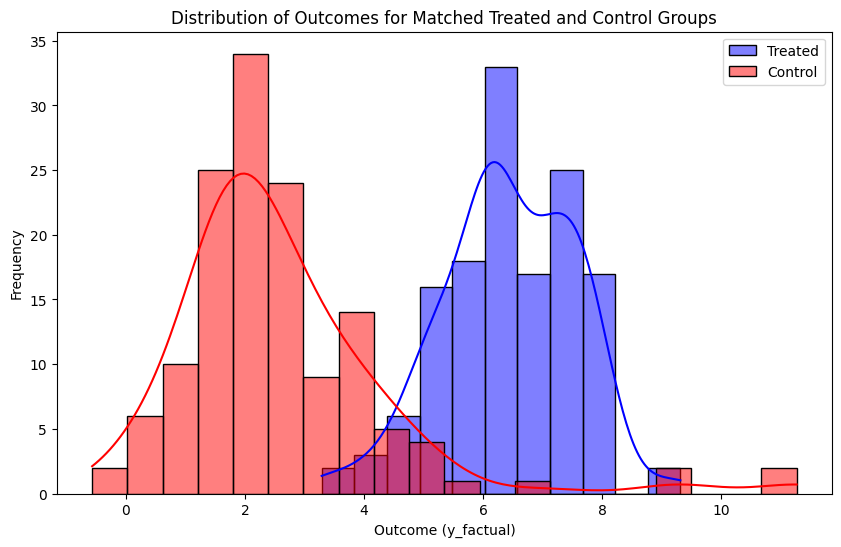

In [ ]:
# Estimate propensity scores using logistic regression
X = data.iloc[:, 5:30]  # Covariates
y = data['treatment']  # Treatment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict propensity scores
data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# Perform propensity score matching
from sklearn.neighbors import NearestNeighbors

# Create a matching function
def propensity_score_matching(data, treatment_col='treatment', propensity_col='propensity_score'):
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]

    nbrs = NearestNeighbors(n_neighbors=1).fit(control[[propensity_col]])
    distances, indices = nbrs.kneighbors(treated[[propensity_col]])

    matched_control = control.iloc[indices.flatten()]
    matched_data = pd.concat([treated, matched_control])

    return matched_data

matched_data = propensity_score_matching(data)

# Compare outcomes between matched treated and control groups
plt.figure(figsize=(10, 6))
sns.histplot(matched_data[matched_data['treatment'] == 1]['y_factual'], color='blue', label='Treated', kde=True)
sns.histplot(matched_data[matched_data['treatment'] == 0]['y_factual'], color='red', label='Control', kde=True)
plt.title('Distribution of Outcomes for Matched Treated and Control Groups')
plt.xlabel('Outcome (y_factual)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Calculate inverse probability weights
data['ipw'] = np.where(data['treatment'] == 1, 1/data['propensity_score'], 1/(1-data['propensity_score']))

# Estimate ATE using IPW
ate_ipw = np.mean(data['treatment'] * data['y_factual'] / data['propensity_score']) - np.mean((1 - data['treatment']) * data['y_factual'] / (1 - data['propensity_score']))
print(f'Estimated ATE using IPW: {ate_ipw}')

Estimated ATE using IPW: 3.659250352444734


In [ ]:
# Estimate propensity scores using logistic regression
X = data.iloc[:, 5:30]  # Covariates
y = data['treatment']  # Treatment

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict propensity scores
data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

In [ ]:
# Create CausalModel
causal = CausalModel(
    Y=data['y_factual'].values,  # Outcome
    D=data['treatment'].values,  # Treatment
    X=data.iloc[:, 5:30].values  # Covariates
)

# Add propensity scores to the CausalModel
causal.pscore = data['propensity_score'].values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel

# Load dataset
data = pd.read_csv("ihdp_data.csv")

# Select covariates and treatment
X = data.iloc[:, 5:30]  # Covariates
y = data["treatment"]  # Treatment

# Fit logistic regression model for propensity score estimation
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X, y)

# Predict propensity scores
data["propensity_score"] = log_reg.predict_proba(X)[:, 1]

# Create CausalModel
causal = CausalModel(
    Y=data["y_factual"].values,  # Outcome
    D=data["treatment"].values,  # Treatment
    X=data.iloc[:, 5:30].values,  # Covariates
)

# Estimate propensity scores using built-in method
causal.est_propensity_s()

# Estimate ATE using OLS
causal.est_via_ols()

# Estimate ATE using Matching
causal.est_via_matching(bias_adj=True)

# Estimate ATE using Weighting (IPW)
causal.est_via_weighting()

# Print the estimated results
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      3.961      0.106     37.461      0.000      3.754      4.168
           ATC      3.974      0.114     34.792      0.000      3.750      4.198
           ATT      3.905      0.104     37.681      0.000      3.702      4.108

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      3.956      0.190     20.765      0.000      3.582      4.329
           ATC      3.942      0.204     19.310      0.000      3.542      4.342
           ATT      4.017      0.215     18.726      0.000      3.596      4.437

Treatment Effect Estimates: Weighting

                     Est.       S.e.          z      P>|z|      [95% Conf. in

/usr/local/lib/python3.11/dist-packages/causalinference/core/propensity.py:173: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(np.linalg.inv(H)))
/usr/local/lib/python3.11/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]
/usr/local/lib/python3.11/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept c

In [ ]:
# Example: Calculate CATE for different subgroups based on a covariate (e.g., x1)
data['x1_group'] = pd.cut(data['x1'], bins=[-np.inf, 0, np.inf], labels=['Low', 'High'])

# Calculate CATE for each subgroup
cate_low = data[data['x1_group'] == 'Low']['treatment'].mean() - data[data['x1_group'] == 'Low']['y_factual'].mean()
cate_high = data[data['x1_group'] == 'High']['treatment'].mean() - data[data['x1_group'] == 'High']['y_factual'].mean()

print(f'CATE for Low x1 group: {cate_low}')
print(f'CATE for High x1 group: {cate_high}')

CATE for Low x1 group: -2.8941550651861974
CATE for High x1 group: -3.038644569155796


In [ ]:
# Create a function to calculate CATE for a given covariate
def calculate_cate(data, covariate, treatment_col='treatment', outcome_col='y_factual'):
    """
    Calculate CATE for subgroups based on a covariate.
    """
    # Split the covariate into "Low" and "High" groups
    data[f'{covariate}_group'] = pd.cut(data[covariate], bins=[-np.inf, 0, np.inf], labels=['Low', 'High'])

    # Calculate CATE for each subgroup
    cate_low = data[data[f'{covariate}_group'] == 'Low'][treatment_col].mean() - data[data[f'{covariate}_group'] == 'Low'][outcome_col].mean()
    cate_high = data[data[f'{covariate}_group'] == 'High'][treatment_col].mean() - data[data[f'{covariate}_group'] == 'High'][outcome_col].mean()

    return {f'{covariate}_Low': cate_low, f'{covariate}_High': cate_high}

# List of covariates (x1 to x25)
covariates = [f'x{i}' for i in range(1, 26)]

# Calculate CATE for all covariates
cate_results = {}
for covariate in covariates:
    cate_results.update(calculate_cate(data, covariate))

# Convert results to a DataFrame for better visualization
cate_df = pd.DataFrame(list(cate_results.items()), columns=['Subgroup', 'CATE'])
print(cate_df)

    Subgroup      CATE
0     x1_Low -2.894155
1    x1_High -3.038645
2     x2_Low -2.830939
3    x2_High -3.080267
4     x3_Low -2.936443
5    x3_High -3.015902
6     x4_Low -2.759458
7    x4_High -3.158110
8     x5_Low -3.002608
9    x5_High -2.948037
10    x6_Low -2.229777
11   x6_High -3.863693
12    x7_Low -3.081207
13   x7_High -2.871606
14    x8_Low -2.952389
15   x8_High -3.177249
16    x9_Low -2.533250
17   x9_High -3.378589
18   x10_Low -3.221035
19  x10_High -2.541113
20   x11_Low -3.064546
21  x11_High -2.726031
22   x12_Low -2.910138
23  x12_High -3.198563
24   x13_Low -2.947495
25  x13_High -3.019867
26   x14_Low       NaN
27  x14_High -2.973460
28   x15_Low -2.795028
29  x15_High -4.064443
30   x16_Low -3.851976
31  x16_High -2.936702
32   x17_Low -2.615464
33  x17_High -3.217768
34   x18_Low -2.445296
35  x18_High -2.993266
36   x19_Low -2.984204
37  x19_High -2.904738
38   x20_Low -2.969591
39  x20_High -2.998208
40   x21_Low -2.922809
41  x21_High -3.246196
42   x22_Lo

In [ ]:
!pip install causalinference

In [ ]:
import pickle

# Assume you have already run your causal inference analysis
# For example:
# causal = CausalModel(Y=data['y_factual'].values, D=data['treatment'].values, X=data.iloc[:, 5:30].values)
# causal.pscore = data['propensity_score'].values
# causal.est_via_ols()
# causal.est_via_matching(bias_adj=True)
# causal.est_via_weighting()

# Create a dictionary to store all results
results = {
    'causal_model': causal,  # Save the CausalModel object
    'propensity_scores': data['propensity_score'],  # Save propensity scores
    'ate_estimates': causal.estimates,  # Save ATE estimates
    'cate_results': cate_results  # Save CATE results (if calculated)
}

# Save the results dictionary to a .pkl file
with open('causal_analysis_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("Results saved to causal_analysis_results.pkl")

Results saved to causal_analysis_results.pkl


In [ ]:
from google.colab import files

# Download the .pkl file
files.download('causal_analysis_results.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>